# Classificar Imagens de Itens de Vestuário

### Objetivo:
Treinar rede neural feed-forward simples com banco de dados de imagens de itens de vestuário para classificar dentro do conjunto de 10 categorias

### Dados:
Banco de dados FashionMNIST publicado pela Zalando Research

https://github.com/zalandoresearch/fashion-mnist#labels

Este conjunto de dados contém imagens de itens de vestuário, como calças, casacos, bolsas etc. O conjunto de dados consiste em 60.000 imagens de treinamento e 10.000 imagens de teste. Cada imagem é uma imagem em escala de cinza com tamanho 28x28 pixels. Existem 10 categorias no total e a cada rótulo é atribuído um número entre 0 e 9

*o banco de dados está contido na biblioteca Keras*

In [1]:
# Carregar bibliotecas
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [3]:
# Carregar dados
fashion_mnist = keras.datasets.fashion_mnist

# Separar em dados de treino e teste
(x_treino, y_treino), (x_teste, y_teste) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


In [8]:
# Verificar dados
print("Shape dos dados de treino (X): ", x_treino.shape)
print("Classes dos dados de treino (Y): ", np.unique(y_treino))
print("Shape dos dados de teste (X):  ", x_teste.shape)
print("Classes dos dados de teste (Y):  ", np.unique(y_teste))

Shape dos dados de treino (X):  (60000, 28, 28)
Classes dos dados de treino (Y):  [0 1 2 3 4 5 6 7 8 9]
Shape dos dados de teste (X):   (10000, 28, 28)
Classes dos dados de teste (Y):   [0 1 2 3 4 5 6 7 8 9]


In [9]:
# Definir labels
class_names = {i:class_n for i, class_n in enumerate(['T-shirt/top', 'Trouser', 
                                            'Pullover', 'Dress', 
                                            'Coat', 'Sandal', 
                                            'Shirt', 'Sneaker', 
                                            'Bag', 'Ankle boot']) }
print(class_names)

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


In [15]:
# Funcao para visualizar imagens
def plot_img(images, labels, predictions=None):
    
    # Criar grid de 5 colunas
    n_cols = min(5, len(images))
    n_rows = math.ceil(len(images) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols + 3, n_rows +4))
    
    # Checar se foram realizas previsoes
    if predictions is None:
        predictions = [None] * len(labels)
        
    # Loop para percorrer os dados e imprimir img
    for i, (x,y_true, y_pred) in enumerate(zip(images, labels, predictions)):
        ax = axes.flat[i]
        ax.imshow(x, cmap = plt.cm.binary)
        
        # imprimir valor real - y
        ax.set_title(f"L: {class_names[y_true]}")
        
        # se existir previsao - imprimir
        if y_pred is not None:
            ax.set_xlabel(f"Prev:{class_names[y_pred]}")
        
        ax.set_xticks([])
        ax.set_yticks([])

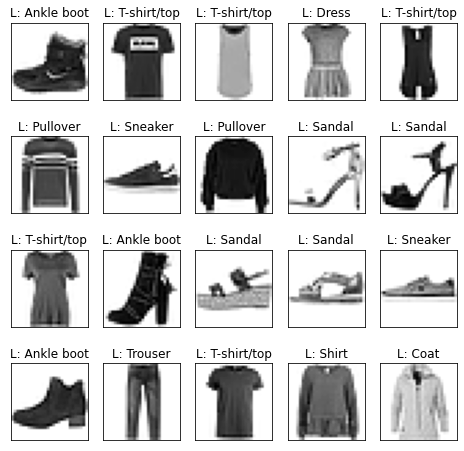

In [17]:
# Plot de algumas imagens
plot_img(x_treino[:20], y_treino[:20])
plt.show()

In [18]:
# Normalizar dados
x_treino = x_treino / 255.0
x_teste = x_teste / 255.0

In [19]:
# Criar o modelo
modelo = keras.Sequential(layers = [
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [20]:
print(modelo)

In [21]:
# Compilar modelo
modelo.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [22]:
# Treinar o modelo
modelo.fit(x_treino, y_treino, batch_size=60, epochs=10, validation_split=0.2)

Epoch 1/10
800/800 [==============================] - 5s 7ms/step - loss: 0.5348 - accuracy: 0.8144 - val_loss: 0.4316 - val_accuracy: 0.8453
Epoch 2/10
800/800 [==============================] - 5s 6ms/step - loss: 0.4032 - accuracy: 0.8571 - val_loss: 0.4059 - val_accuracy: 0.8565
Epoch 3/10
800/800 [==============================] - 6s 7ms/step - loss: 0.3660 - accuracy: 0.8677 - val_loss: 0.4107 - val_accuracy: 0.8535
Epoch 4/10
800/800 [==============================] - 6s 7ms/step - loss: 0.3356 - accuracy: 0.8776 - val_loss: 0.3524 - val_accuracy: 0.8748
Epoch 5/10
800/800 [==============================] - 6s 7ms/step - loss: 0.3194 - accuracy: 0.8834 - val_loss: 0.3579 - val_accuracy: 0.8772
Epoch 6/10
800/800 [==============================] - 6s 7ms/step - loss: 0.3009 - accuracy: 0.8900 - val_loss: 0.3461 - val_accuracy: 0.8738
Epoch 7/10
800/800 [==============================] - 6s 7ms/step - loss: 0.2871 - accuracy: 0.8949 - val_loss: 0.3265 - val_accuracy: 0.8832
Epoch 

In [23]:
# Avaliar modelo com dados de teste
loss, accuracy = modelo.evaluate(x_teste, y_teste)
print(f"Acurácia = {accuracy * 100:.2f}%")

313/313 [==============================] - 1s 5ms/step - loss: 0.3631 - accuracy: 0.8698
Acurácia = 86.98%


In [25]:
# Gravar previsoes
pred = modelo.predict_classes(x_teste)

# Previsoes do modelo
print(pred)

[9 2 1 ... 8 1 5]


In [26]:
# Coletar algumas imagens randomicamente
rand_idxs = np.random.permutation(len(x_teste))[:20]

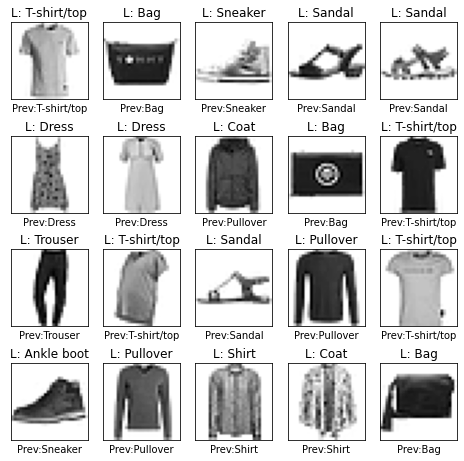

In [27]:
# Plot das previsoes
plot_img(x_teste[rand_idxs], y_teste[rand_idxs], pred[rand_idxs])
plt.show()